In [2]:
import pandas as pd
import os
import geopandas as gpd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import spearmanr

data_dir = os.path.join("../../data/embeddings/")
imd_file = os.path.join("../../", "data", "imd", "File_2_-_IoD2019_Domains_of_Deprivation.xlsx")

var_to_predict = 'imd_rank'

def evaluate_imd_model(y_true, y_pred, plot=True):
    """
    Evaluate regression predictions for IMD rank.
    
    Parameters:
    - y_true: array-like, true IMD ranks
    - y_pred: array-like, predicted IMD ranks
    - plot: bool, whether to show scatter plot of predicted vs actual
    
    Returns:
    - metrics: dictionary with RMSE, MAE, R2, Spearman correlation
    """
    # Metrics
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    spearman_corr, _ = spearmanr(y_true, y_pred)

    metrics = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'Spearman_rank_corr': spearman_corr}

    # Print metrics
    print("Model evaluation metrics:")
    for k, v in metrics.items():
        print(f"{k}: {v:.3f}")

    # Scatter plot
    if plot:
        plt.figure(figsize=(6,6))
        plt.scatter(y_true, y_pred, alpha=0.7)
        plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', lw=2)
        plt.xlabel("True IMD Rank")
        plt.ylabel("Predicted IMD Rank")
        plt.title("Predicted vs Actual IMD Rank")
        plt.grid(True)
        plt.show()

    return metrics

### Get imd data

In [4]:
imd = pd.read_excel(imd_file, sheet_name="IoD2019 Domains", header=0)

# Rename columns to simpler versions
imd_col_map = {"LSOA code (2011)": "LSOA11CD",
    "Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)": "imd_rank",
    "Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)": "imd_decile"}
imd = imd.rename(columns=imd_col_map)

# 2. Using mean embedding per LSOA, based on mean each location

### Get data

In [5]:
avg_embeddings = pd.read_pickle(data_dir +"mean_embeddings_per_lsoa_from_mean.pkl")
avg_embeddings_with_imd = pd.merge(left=avg_embeddings, right=imd, on="LSOA11CD")

### Build model

Model evaluation metrics:
RMSE: 5843.716
MAE: 4696.391
R2: 0.630
Spearman_rank_corr: 0.763


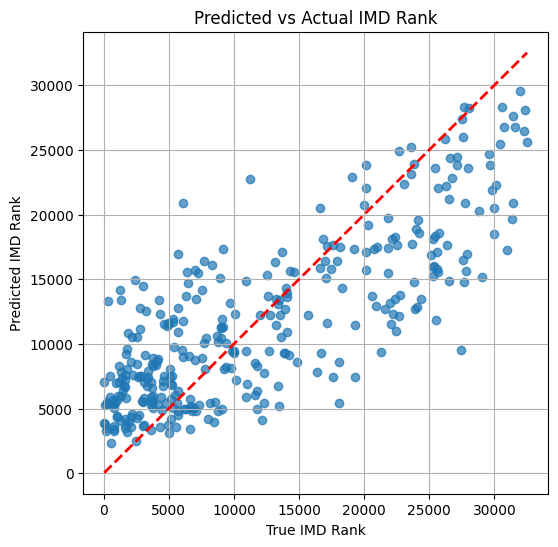

In [6]:
X = np.stack(avg_embeddings_with_imd["mean_embedding"].values)     # shape (n_points, embed_dim)
y = avg_embeddings_with_imd['imd_rank'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a model (Random Forest Regressor example)
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)

# Usage example:
metrics = evaluate_imd_model(y_test, y_pred)

## Build model for different domains of deprivation

imd_rank
Model evaluation metrics:
RMSE: 5843.716
MAE: 4696.391
R2: 0.630
Spearman_rank_corr: 0.763


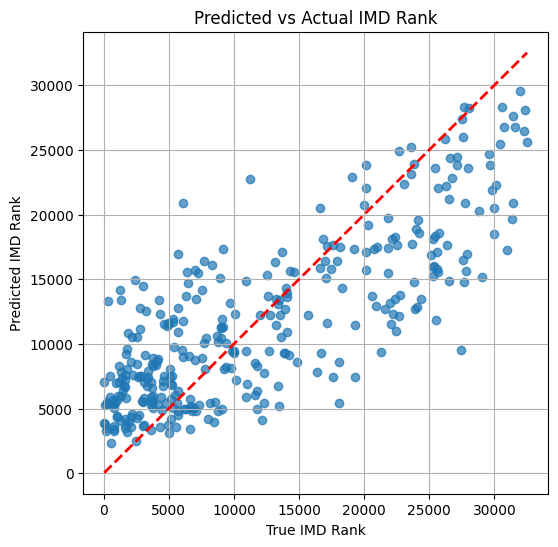

imd_decile
Model evaluation metrics:
RMSE: 1.796
MAE: 1.446
R2: 0.624
Spearman_rank_corr: 0.749


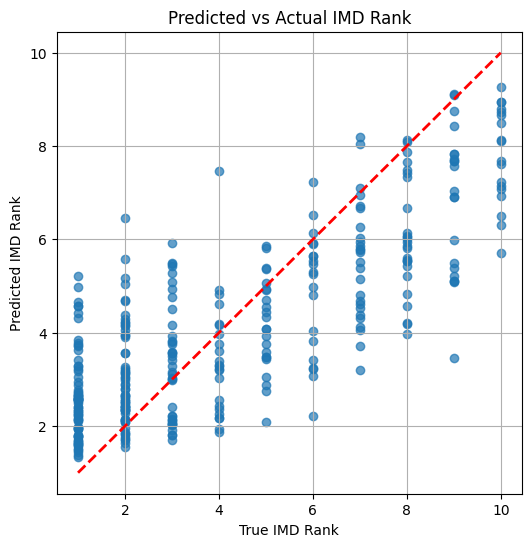

Income Rank (where 1 is most deprived)
Model evaluation metrics:
RMSE: 6399.762
MAE: 5142.668
R2: 0.592
Spearman_rank_corr: 0.760


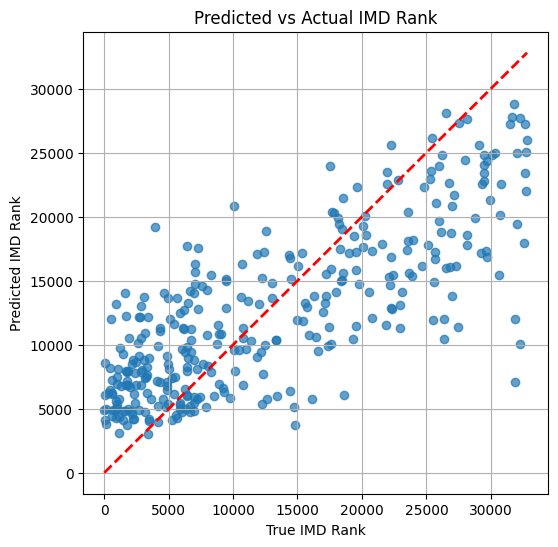

Income Decile (where 1 is most deprived 10% of LSOAs)
Model evaluation metrics:
RMSE: 1.950
MAE: 1.574
R2: 0.582
Spearman_rank_corr: 0.748


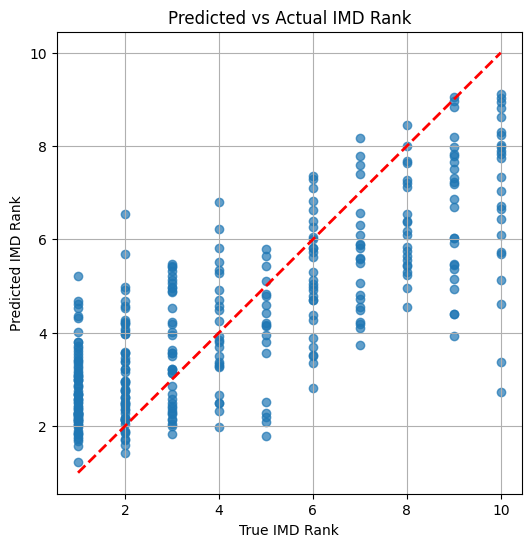

Employment Rank (where 1 is most deprived)
Model evaluation metrics:
RMSE: 6173.159
MAE: 4814.056
R2: 0.553
Spearman_rank_corr: 0.736


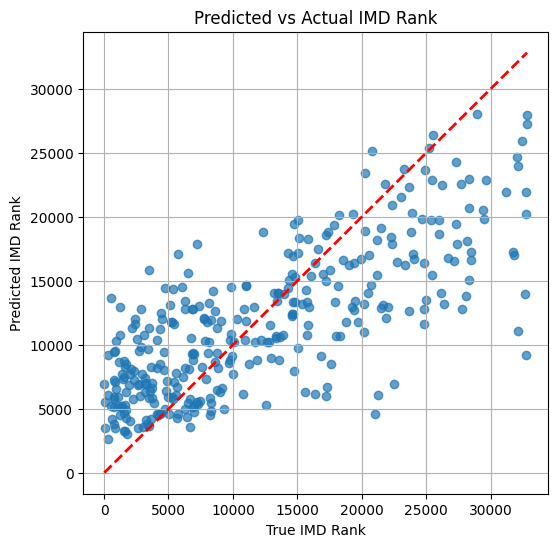

Employment Decile (where 1 is most deprived 10% of LSOAs)
Model evaluation metrics:
RMSE: 1.850
MAE: 1.443
R2: 0.551
Spearman_rank_corr: 0.731


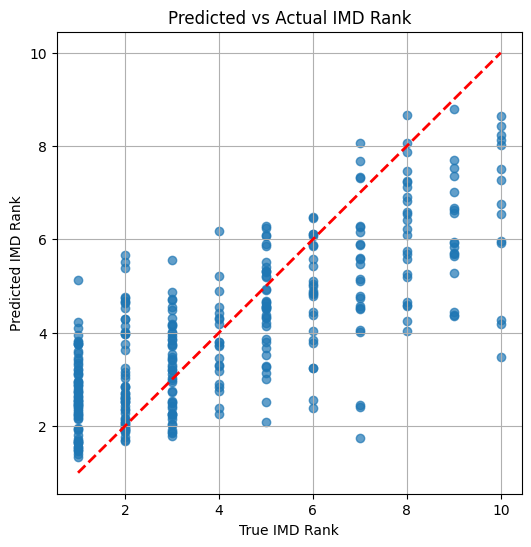

Education, Skills and Training Rank (where 1 is most deprived)
Model evaluation metrics:
RMSE: 6342.121
MAE: 5205.834
R2: 0.606
Spearman_rank_corr: 0.784


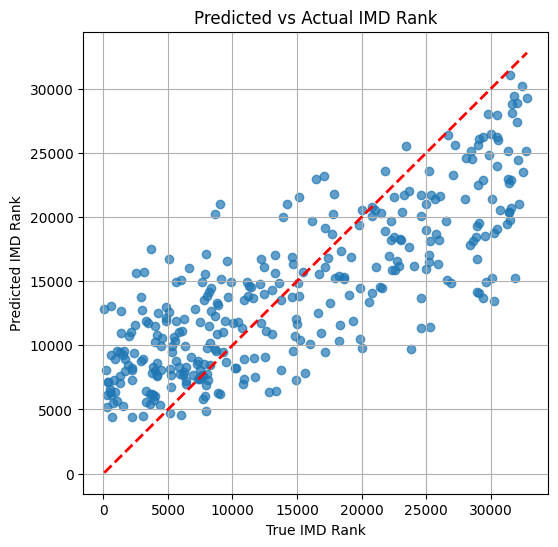

Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)
Model evaluation metrics:
RMSE: 1.918
MAE: 1.568
R2: 0.602
Spearman_rank_corr: 0.776


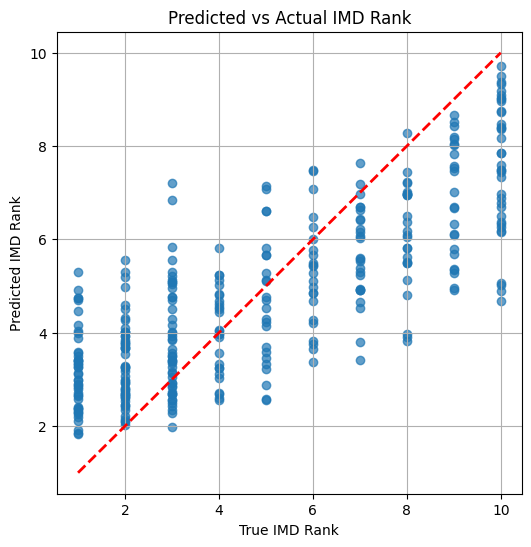

Health Deprivation and Disability Rank (where 1 is most deprived)
Model evaluation metrics:
RMSE: 4676.811
MAE: 3726.175
R2: 0.564
Spearman_rank_corr: 0.715


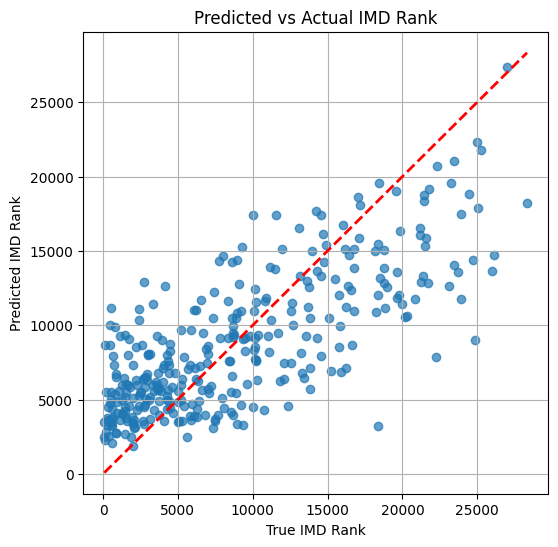

Health Deprivation and Disability Decile (where 1 is most deprived 10% of LSOAs)
Model evaluation metrics:
RMSE: 1.433
MAE: 1.140
R2: 0.555
Spearman_rank_corr: 0.707


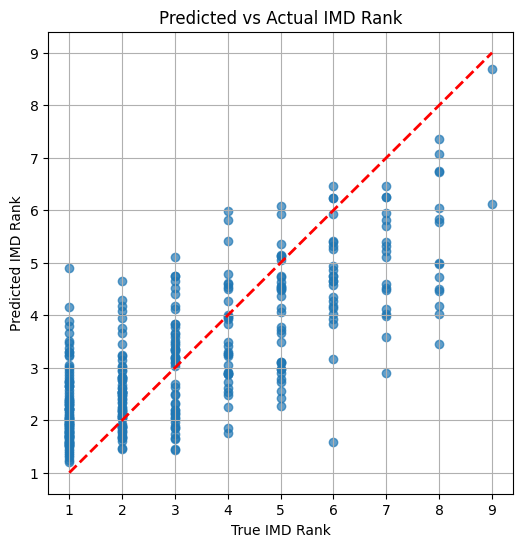

Crime Rank (where 1 is most deprived)
Model evaluation metrics:
RMSE: 5978.404
MAE: 4754.325
R2: 0.388
Spearman_rank_corr: 0.623


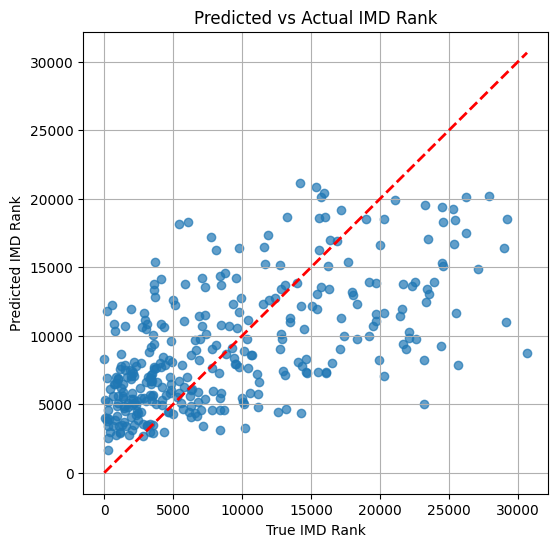

Crime Decile (where 1 is most deprived 10% of LSOAs)
Model evaluation metrics:
RMSE: 1.819
MAE: 1.450
R2: 0.372
Spearman_rank_corr: 0.605


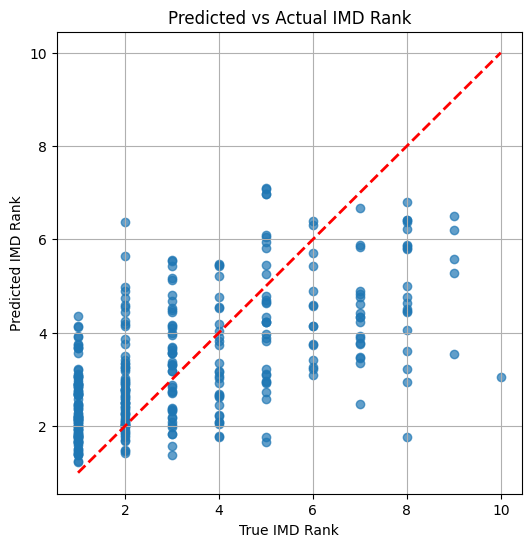

Barriers to Housing and Services Rank (where 1 is most deprived)
Model evaluation metrics:
RMSE: 6736.776
MAE: 5753.232
R2: 0.304
Spearman_rank_corr: 0.555


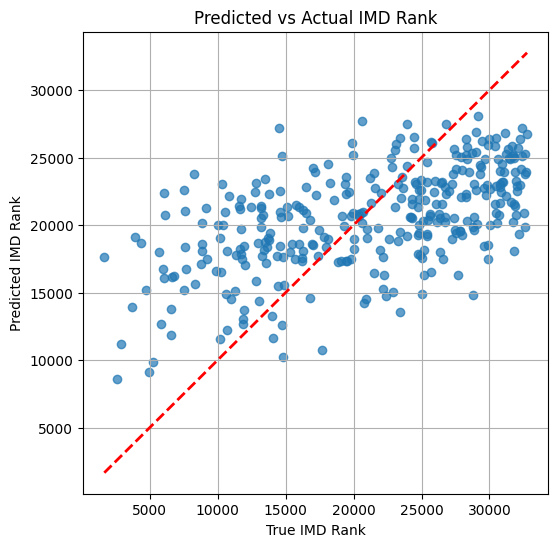

Barriers to Housing and Services Decile (where 1 is most deprived 10% of LSOAs)
Model evaluation metrics:
RMSE: 2.042
MAE: 1.745
R2: 0.300
Spearman_rank_corr: 0.552


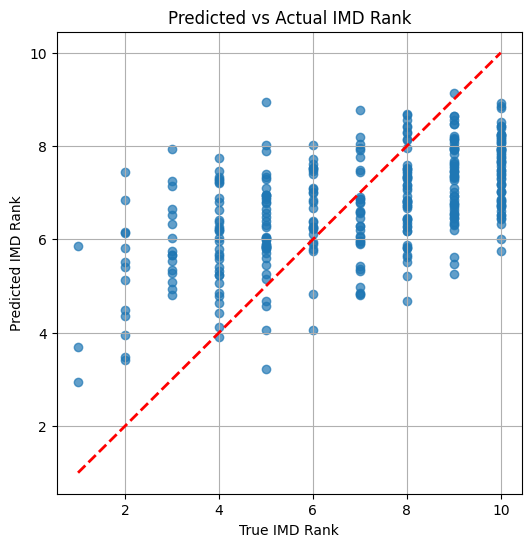

Living Environment Rank (where 1 is most deprived)
Model evaluation metrics:
RMSE: 5630.880
MAE: 4633.601
R2: 0.554
Spearman_rank_corr: 0.751


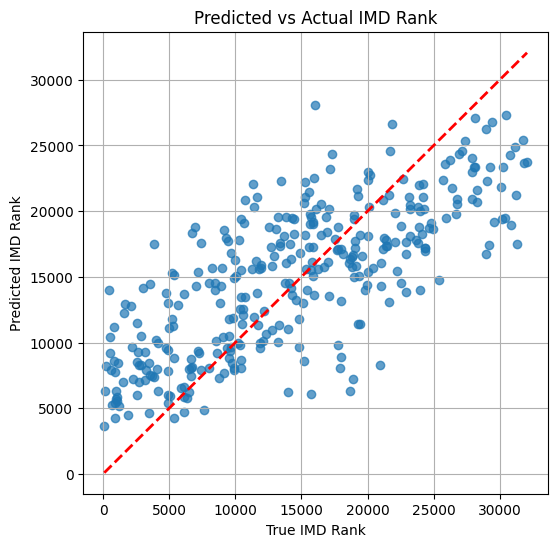

Living Environment Decile (where 1 is most deprived 10% of LSOAs)
Model evaluation metrics:
RMSE: 1.709
MAE: 1.414
R2: 0.556
Spearman_rank_corr: 0.754


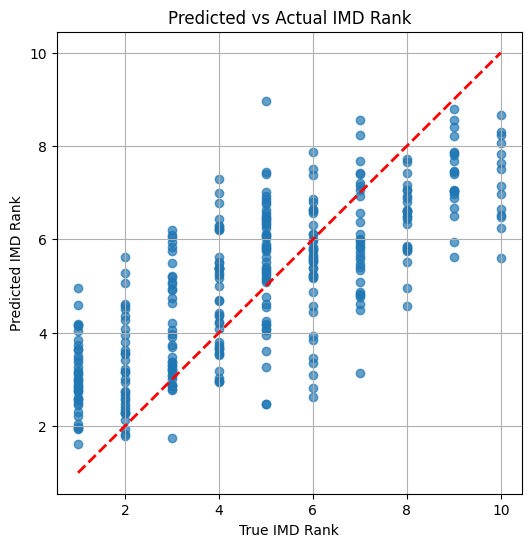

In [17]:
for column in avg_embeddings_with_imd.columns[5:]:
    print(column)
    x = np.stack(avg_embeddings_with_imd["mean_embedding"].values)     # shape (n_points, embed_dim)
    y = avg_embeddings_with_imd[column].values

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit a model (Random Forest Regressor example)
    rf = RandomForestRegressor(n_estimators=200, random_state=42)
    rf.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = rf.predict(X_test)

    # Usage example:
    metrics = evaluate_imd_model(y_test, y_pred)